# Proyek Analisis Data [E-commerce]

**Nama:** Hilmi Rahman Nurdiansyah

**Email:** m004d4ky1753@bangkit.academy/

hilmirahman2013@gmail.com

**ID Dicoding** hilmi2906r


## Menentukan Pertanyaan Bisnis


1.   apa produk dengan tingkat penjualan tertinggi
2.   seller city dengan tingkat penjualan tertinggi



## Mengenai Dataset
Disini saya menggunakan E-Commerce Public Dataset sebagai data yang akan di analisis

## Menyiapkan Library yang akan dipakai

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering data

read `customers_df`

In [3]:
customers_df = pd.read_csv('drive/MyDrive/Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


read `geolocation_df`

In [4]:
geolocation_df = pd.read_csv('drive/MyDrive/Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


read `order_items_df`

In [5]:
order_items_df = pd.read_csv('drive/MyDrive/Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,product_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


read `order_payments_df`

In [6]:
order_payments_df = pd.read_csv('drive/MyDrive/Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


read `order_review_df`

In [7]:
order_review_df = pd.read_csv('drive/MyDrive/Dataset/order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


read `orders_df`

In [8]:
orders_df = pd.read_csv('drive/MyDrive/Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


read `product_translate_df`

In [9]:
product_translate_df = pd.read_csv('drive/MyDrive/Dataset/product_category_name_translation.csv')
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


read `products_df`

In [10]:
products_df = pd.read_csv('drive/MyDrive/Dataset/products_dataset.csv')
products_df.head()

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


read `sellers_df`

In [11]:
sellers_df = pd.read_csv('drive/MyDrive/Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_zip_code_prefix,seller_city,seller_state,seller_id
0,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15
1,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2
2,20031,rio de janeiro,RJ,ce3ad9de960102d0677a81f5d0bb7b2d
3,4195,sao paulo,SP,c0f3eea2e14555b6faeea3dd58c1b1c3
4,12914,braganca paulista,SP,51a04a8a6bdcb23deccc82b0b80742cf


### Assessing Data

#### Menilai Tabel `customers_df`

Periksa tipe data dan parameter statistik

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Periksa missing value & Duplikasi Data

In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai Tabel `Geolocation_df`

Periksa tipe data

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Periksa missing value & Duplikasi Data serta parameter statistik

In [17]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [19]:
print("Jumlah duplikasi: ", geolocation_df.nunique().duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai Tabel `order_items_df`

Periksa tipe data

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   product_id           112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df.nunique()

order_id               98666
product_id             32951
order_item_id             21
seller_id               3095
shipping_limit_date    54615
price                   5968
freight_value           6999
dtype: int64

Periksa missing value & Duplikasi Data serta parameter statistik

In [22]:
order_items_df.isna().sum()

order_id               0
product_id             0
order_item_id          0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai `Tabel Order_Payment_df`

In [24]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


mengecek missing value

In [25]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

mengecek duplikasi dan parameter statistik

In [26]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe(include="all")

Jumlah duplikasi:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Menilai `order_review_df`

mengecek tipe data

In [27]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


mengecek duplikasi dan parameter statistik

In [68]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())
order_review_df.describe(include="all")

Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,98156,98156,98156.000000,11509,40580,98156,98156
unique,98156,98156,NaN,4525,36086,636,97994
top,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,1,1,NaN,421,229,459,3
mean,NaN,NaN,4.088808,NaN,NaN,NaN,NaN
std,NaN,NaN,1.345704,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


cek missing value

In [29]:
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### menilai `Orders_df`

mengecek tipe data & parameter statistik

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


mengecek duplikasi data

In [69]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


#### Menilai `product_translate`

mengecek tipe data dan missing value

In [33]:
product_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [34]:
product_translate_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

mengecek duplikasi dan parameter statistik

In [35]:
print("Jumlah duplikasi: ", product_translate_df.duplicated().sum())
product_translate_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

mengecek tipe data dan missing value

In [36]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_id                  32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
products_df.isna().sum()

product_category_name         610
product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

mengecek duplikasi data serta parameter statistik

In [38]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

mengecek tipe data dan missing value

In [39]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_zip_code_prefix  3095 non-null   int64 
 1   seller_city             3095 non-null   object
 2   seller_state            3095 non-null   object
 3   seller_id               3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
sellers_df.isna().sum()

seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_id                 0
dtype: int64

mengecek duplikasi data dan parameter statistik

In [41]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Cleaning Data

### Membersihkan data `order_items_df`

In [42]:

order_items_df.drop_duplicates(subset='order_id', keep='last', inplace=True)
print("Jumlah duplikasi : ", order_items_df.duplicated('order_id').sum())

Jumlah duplikasi :  0


### Membersihkan data `orders_df`

In [43]:

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Membersihkan data `order_reviews_df`

In [44]:
order_review_df.drop_duplicates(subset='order_id', inplace=True)
order_review_df.drop_duplicates(subset='review_id', inplace=True)

# Periksa kembali
print("Jumlah duplikasi 'order_id' : ", order_review_df.duplicated("order_id").sum())
print("Jumlah duplikasi 'review_id' : ", order_review_df.duplicated("review_id").sum())

Jumlah duplikasi 'order_id' :  0
Jumlah duplikasi 'review_id' :  0


### Membersihkan data `product_df`

In [45]:
products_df.rename(columns={
    "product_name_lenght" : "product_name_length",
    "product_description_lenght" : "product_description_length"
}, inplace=True)

In [46]:
imputation_columns = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

for column in imputation_columns:
    products_df[column].fillna(value=products_df[column].mean(), inplace=True)

products_df.isna().sum()

product_category_name         610
product_id                      0
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [47]:
products_df['product_category_name'].interpolate(method='ffill', inplace=True)

# Periksa kembali
products_df.isna().sum()

product_category_name           0
product_id                      0
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [48]:
products_df = products_df.dropna()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_id                  32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Eksplor Data

### Menggabungkan data `order_items_df` dan `products_df`

In [49]:
product_items_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
product_items_df

,product_category_name,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,4/30/2018 17:33,10.91,7.39
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2/6/2018 19:11,248.00,17.99
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,7/11/2018 21:30,79.80,7.82
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,8/7/2018 9:10,112.30,9.54
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,4/17/2018 1:30,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99724,NaN,28209b7aed95f7c0c9b9806f974a104e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fe421e7d38d622aedc8ca97d58771ea6,1.0,432c37c9dfba871172ec162e20118b8c,4/27/2017 8:55,119.90,18.27
99725,NaN,41bf6a8c9424d4ec060e39e21883db3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fe7387b4827383e4868b82be1dd12722,1.0,226b05fe067266c59c15dae208213d06,4/8/2018 22:55,29.90,17.06
99726,NaN,40a1e3c65a0bcf6f4ebba840a8156ba2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fe97f3949cbc37b9ab48ac5769514cbe,1.0,f3295428338a40977a03f555246a70f4,12/5/2017 13:39,29.90,15.10
99727,NaN,34a4076cd057a823247a5a44e84872d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fea563d194760a0737be8bff36ca8c40,1.0,520b493b57809f446cb0a233bb3e25c7,6/15/2017 18:35,59.90,17.67


In [50]:
product_items_df.nunique()

product_category_name            73
product_id                    32925
product_name_length              66
product_description_length     2960
product_photos_qty               19
product_weight_g               2203
product_length_cm               100
product_height_cm               103
product_width_cm                 96
order_id                      98666
order_item_id                    17
seller_id                      3084
shipping_limit_date           54502
price                          5887
freight_value                  6756
dtype: int64

mengecek missing value kembali setelah merge

In [51]:
product_items_df.isna().sum()

product_category_name         1418
product_id                       0
product_name_length           1418
product_description_length    1418
product_photos_qty            1418
product_weight_g              1418
product_length_cm             1418
product_height_cm             1418
product_width_cm              1418
order_id                      1063
order_item_id                 1063
seller_id                     1063
shipping_limit_date           1063
price                         1063
freight_value                 1063
dtype: int64

In [52]:
product_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99729 entries, 0 to 99728
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       98311 non-null  object 
 1   product_id                  99729 non-null  object 
 2   product_name_length         98311 non-null  float64
 3   product_description_length  98311 non-null  float64
 4   product_photos_qty          98311 non-null  float64
 5   product_weight_g            98311 non-null  float64
 6   product_length_cm           98311 non-null  float64
 7   product_height_cm           98311 non-null  float64
 8   product_width_cm            98311 non-null  float64
 9   order_id                    98666 non-null  object 
 10  order_item_id               98666 non-null  float64
 11  seller_id                   98666 non-null  object 
 12  shipping_limit_date         98666 non-null  object 
 13  price                       986

### Membersihkan missing data setelah merge `product_items_df`

In [55]:
product_items_df.nunique()

product_category_name            73
product_id                    32925
product_name_length              66
product_description_length     2960
product_photos_qty               19
product_weight_g               2203
product_length_cm               100
product_height_cm               103
product_width_cm                 96
order_id                      98666
order_item_id                    17
seller_id                      3084
shipping_limit_date           54502
price                          5887
freight_value                  6756
dtype: int64

In [56]:
product_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99729 entries, 0 to 99728
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       98311 non-null  object 
 1   product_id                  99729 non-null  object 
 2   product_name_length         98311 non-null  float64
 3   product_description_length  98311 non-null  float64
 4   product_photos_qty          98311 non-null  float64
 5   product_weight_g            98311 non-null  float64
 6   product_length_cm           98311 non-null  float64
 7   product_height_cm           98311 non-null  float64
 8   product_width_cm            98311 non-null  float64
 9   order_id                    98666 non-null  object 
 10  order_item_id               98666 non-null  float64
 11  seller_id                   98666 non-null  object 
 12  shipping_limit_date         98666 non-null  object 
 13  price                       986

In [57]:
product_items_df.isna().sum()


product_category_name         1418
product_id                       0
product_name_length           1418
product_description_length    1418
product_photos_qty            1418
product_weight_g              1418
product_length_cm             1418
product_height_cm             1418
product_width_cm              1418
order_id                      1063
order_item_id                 1063
seller_id                     1063
shipping_limit_date           1063
price                         1063
freight_value                 1063
dtype: int64

disini saya gunakan drop untuk membersihkan produk kategori yang missing value

In [58]:
product_df=product_items_df.dropna()
product_df.isna().sum()

product_category_name         0
product_id                    0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
order_id                      0
order_item_id                 0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
dtype: int64

### Menggabungkan data `seller_df` dan `order_items_df`

In [53]:
seller_order_df = pd.merge(
    left=sellers_df,
    right=order_items_df,
    how="outer",
    left_on="seller_id",
    right_on="seller_id"
)
seller_order_df.head()

,seller_zip_code_prefix,seller_city,seller_state,seller_id,order_id,product_id,order_item_id,shipping_limit_date,price,freight_value
0,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,1.0,8/25/2017 20:50,106.20,9.56
1,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,1.0,5/11/2017 16:25,101.70,15.92
2,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,2.0,9/5/2017 12:50,10.80,2.42
3,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,1.0,11/22/2017 4:30,89.99,45.09
4,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,8852eb03b04ec3268a66e9b696e25f6f,1.0,10/6/2017 2:14,199.90,21.89


mengecek missing value kembali setelah merge

In [71]:
print("jumlah duplicate: ", seller_order_df.duplicated().sum())
seller_order_df.isna().sum()

jumlah duplicate:  0


seller_zip_code_prefix     0
seller_city                0
seller_state               0
seller_id                  0
order_id                  11
product_id                11
order_item_id             11
shipping_limit_date       11
price                     11
freight_value             11
dtype: int64

In [72]:
seller_order_df = seller_order_df.dropna()
seller_order_df.isna().sum()

seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_id                 0
order_id                  0
product_id                0
order_item_id             0
shipping_limit_date       0
price                     0
freight_value             0
dtype: int64

### pertanyaan bisnis pertama
pengelompokan barang yang terjual dengan product.id yang ada

akan ditunjukkan barang mana yang memiliki trend tertinggi.

In [59]:
product_items_df.groupby(by="product_category_name").product_id.count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  9518
beleza_saude                     8858
esporte_lazer                    7748
informatica_acessorios           6710
moveis_decoracao                 6510
                                 ... 
la_cuisine                         12
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       6
seguros_e_servicos                  2
Name: product_id, Length: 73, dtype: int64

In [60]:
product_items_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

terlihat apabila diurutkan dari yang terbesar product cama_mesa_banho menunjukkan angka tertinggi maka barang tersebut yang paling sering dipesan.

### Pertanyaan kedua
disini kita akan mencari tau seller yang paling sering menjual barang. disini akan di kelompokkan setiap kota seller dengan count state

In [73]:
seller_order_df.groupby(by="seller_city").seller_id.count().sort_values(ascending=False)

seller_city
sao paulo               24375
ibitinga                 6500
curitiba                 2689
santo andre              2687
belo horizonte           2397
                        ...  
mogi das cruzes / sp        1
sbc                         1
são paulo                  1
nhandeara                   1
04482255                    1
Name: seller_id, Length: 611, dtype: int64

Sau Paulo menempati urutan pertama dengan penjualan barang terbanyak

### Explore `customers_df` dan `orders_df`

In [74]:
order_customers_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='right',
    left_on="customer_id",
    right_on="customer_id"
)
order_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [76]:
order_customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menghitung banyaknya customer tiap city dan state

In [77]:
order_customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [78]:
order_customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

## Visualisasi Data & Eksplanatori Data

### Pertanyaan 1





Berdasarkan pertanyaan pertama yaitu produk yang memiliki penjualan tertinggi. disini saya menggunakan head(10) agar hanya di tampilkan 10 data penjualan produk tertinggi.

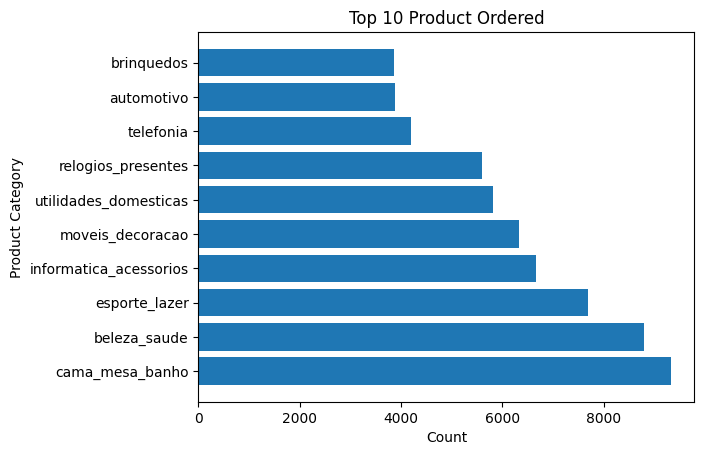

In [80]:
category_counts = product_df.groupby("product_category_name")["order_id"].count()
top_categories = category_counts.sort_values(ascending=False).head(10)
plt.barh(y=top_categories.index, width=top_categories.values)
plt.xlabel('Count')  # Label for x-axis
plt.ylabel('Product Category')  # Label for y-axis
plt.title('Top 10 Product Ordered')
plt.show()

### Pertanyaan Kedua

untuk pertanyaan kedua yaitu seller yang memiliki penjualan terbanyak di setiap kota, disini saya menggunakan 10 terbesar saja

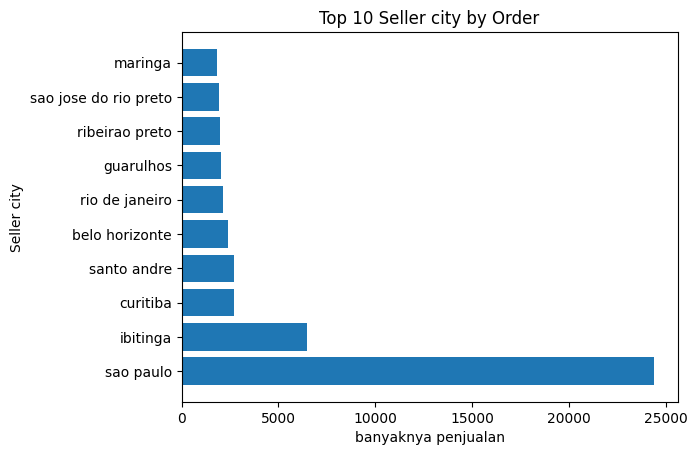

In [65]:
city_counts = seller_order_df.groupby("seller_city")["seller_id"].count()
top_city = city_counts.sort_values(ascending=False).head(10)

plt.barh(y=top_city.index, width=top_city.values)
plt.xlabel('banyaknya penjualan')  # Label for x-axis
plt.ylabel('Seller city')  # Label for y-axis
plt.title('Top 10 Seller city by Order')  # Title for the plot
plt.show()

## Kesimpulan

### Pertanyaan 1

Berdasarkan Visualisasi data produk dengan pembelian terbanyak adalah cama_mesa_banho dengan total 9518 order

### Pertanyaan 2

Berdasarkan visualisasi data kota seller yang memiliki penjualan terbanyak adalah Sao Paolo dengan 24375 order

## content for Dashboard

In [66]:
file_path = 'drive/MyDrive/Dataset/seller_order.csv'
seller_order_df.to_csv(file_path, index=False)

In [67]:
file_path2= 'drive/MyDrive/Dataset/product_items.csv'
product_df.to_csv(file_path2, index=False)